## Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
test_df=pd.read_csv('titanic_test.csv')
test=test_df.copy()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Dimension of Datasets
print(f'Dimension of Train dataset :\n{train_df.shape}')
print(f'Dimension of Train dataset :\n{test_df.shape}')

Dimension of Train dataset :
(891, 12)
Dimension of Train dataset :
(418, 11)


In [5]:
# Checking for Missing Values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Display information about datasets 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# Checking for Class Imbalance
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

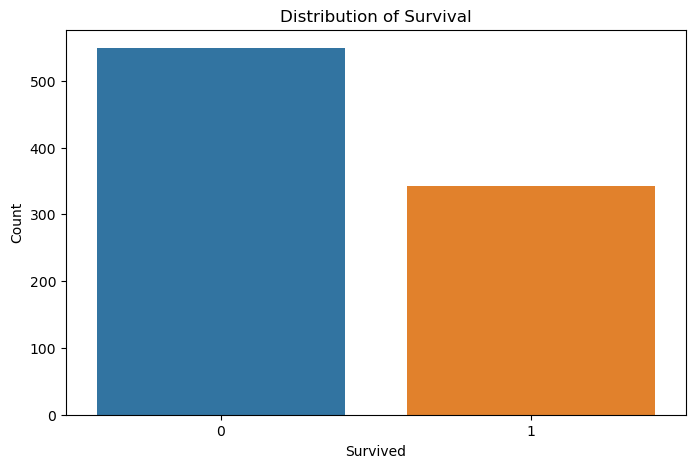

In [10]:
# Visualizing the target variable

plt.figure(figsize=(8,5))
sns.countplot(data=train_df,x='Survived')
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

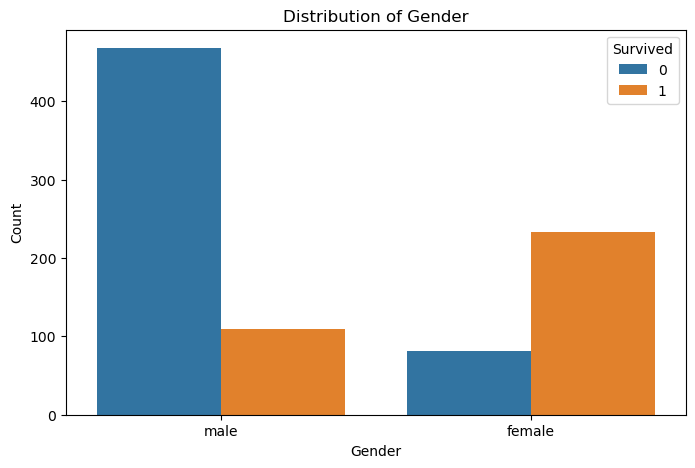

In [11]:
# Visualizing categorical feature

plt.figure(figsize=(8,5))
sns.countplot(x='Sex',hue='Survived', data=train_df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

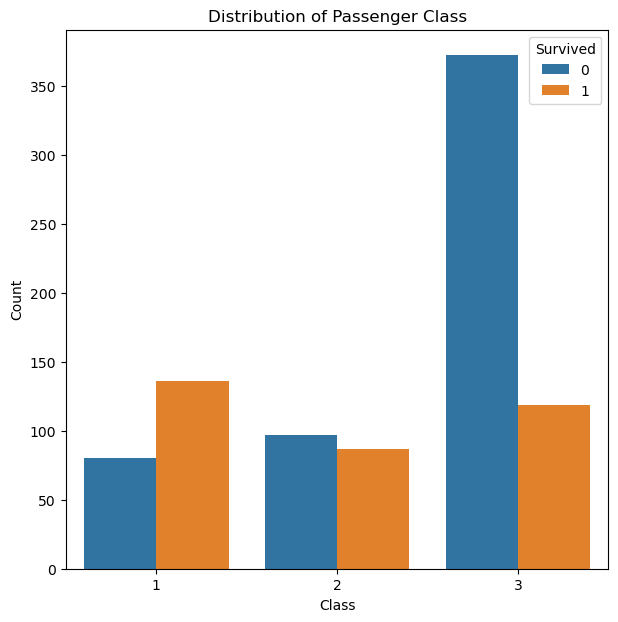

In [12]:
plt.figure(figsize=(7,7))
sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title('Distribution of Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

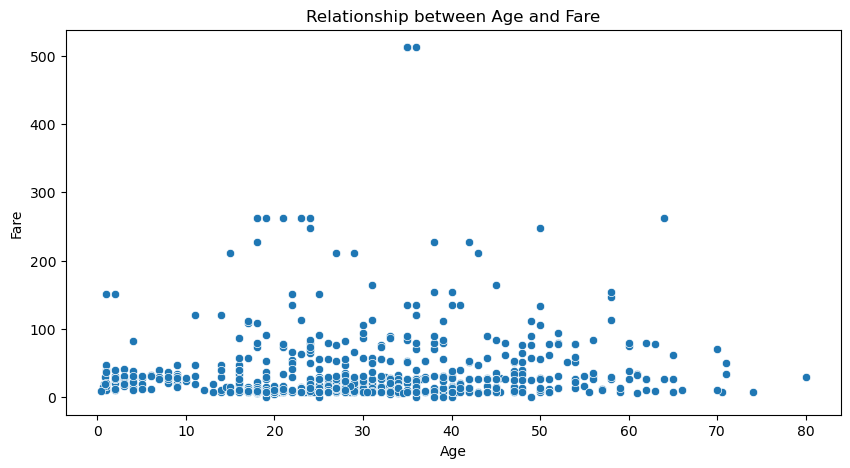

In [13]:
# Visualizing numerical feature
plt.figure(figsize=(10,5))
sns.scatterplot(data=train_df,x='Age',y='Fare')
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

## Data Cleaning and Preprocessing

In [14]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
columns_to_drop = ['PassengerId','Name','Ticket','Cabin']
train_df=train_df.drop(columns_to_drop,axis=1)
test_df=test_df.drop(columns_to_drop,axis=1)

In [16]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [17]:
# Handling Missing value,doing scaling and encoding
numerical_features=['Age','SibSp','Parch','Fare']
numerical_transformer=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                                      ('scaler',StandardScaler())
                                      ])

categorical_features=['Sex','Embarked']
categorical_transformer=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                                        ('onehot',OneHotEncoder(drop='first'))])

preprocessor=ColumnTransformer(transformers=[('num',numerical_transformer,numerical_features),
                                             ('cat',categorical_transformer,categorical_features)])

pipeline = Pipeline(steps=[('preprocessor',preprocessor)])

pipeline.fit(train_df[features])

X=pipeline.transform(train_df[features])
y=train_df['Survived']

test_df=pipeline.transform(test_df[features])

## Model Building and Evaluation 

In [20]:
# Splitting into train and val 

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,random_state=42)

# Building Multiple Model 

models={'Logistic':(LogisticRegression(),
                    {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'penalty': ['l1', 'l2','elasticnet'],
                     'max_iter':[50,100,200]
                     }),

        'RandomForest':(RandomForestClassifier(),
                        {'n_estimators': [50, 100,150, 200],
                         #'criterion':['gini','entrophy'],
                         'max_depth': [None,5,7, 10, 20,30],
                         'min_samples_split': [2, 5,7, 10],
                         'min_samples_leaf': [1, 2, 4,8]
                         }),

        'GradientBoosting':(GradientBoostingClassifier(),
                            {'n_estimators': [50, 100,150, 200],
                             'learning_rate': [0.01,0.05, 0.1, 0.2],
                             #'min_samples_split': [2,5,7],
                             #'min_samples_leaf': [1,2,4],
                             'max_depth': [3, 5, 7,10,15]
                             }),

        'SVC':(SVC(),
               {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto']
                }),

       'KNN':(KNeighborsClassifier(),
              {'n_neighbors': [3, 5, 7, 9,12,15],
               'weights': ['uniform', 'distance'],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
               })
}


In [21]:
for model_name,(model,param_grid) in models.items():
    gs=GridSearchCV(model,param_grid,cv=4,scoring='accuracy')
    gs.fit(X_train,y_train)
    model=gs.best_estimator_
    print(f'-----------  {model} -----------')
    score=gs.best_score_
    print(f'Mean validation score : {score}')
    y_pred_val=model.predict(X_val)
    acc_score=accuracy_score(y_val,y_pred_val)
    print(f'Accuracy score :{acc_score}')
    report=classification_report(y_val,y_pred_val)
    print(f'classification report : \n{report}')
    cm=confusion_matrix(y_val,y_pred_val)
    print(f'Confusion Matrix : \n {cm}')

-----------  LogisticRegression(C=0.1, max_iter=50) -----------
Mean validation score : 0.7934131736526946
Accuracy score :0.7937219730941704
classification report : 
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       134
           1       0.77      0.70      0.73        89

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

Confusion Matrix : 
 [[115  19]
 [ 27  62]]
-----------  RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50) -----------
Mean validation score : 0.8248502994011976
Accuracy score :0.820627802690583
classification report : 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       134
           1       0.79      0.75      0.77        89

    accuracy                           0.82       223
   macro avg       0.81      0.81   

In [22]:
clf=RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50)
clf.fit(X,y)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50)

In [24]:
prediction=clf.predict(test_df)

In [32]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
